In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, KFold

## Baseline models

I'll create baseline models using just the data in the Sao Paulo house prifes dataframe. This will be used to verify if adding the data from ibge was useful the improve the models.

I'll use cross validation

### Load Sao Paulo house prices data

In [3]:
df_prices = pd.read_csv('../data/interim/Data_Day3.csv')

In [4]:
df_prices.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
count,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000,8737.000000
mean,328.490901,3.330434,3.688337,3.742818,2.875162,7.952608
std,226.987330,0.843326,1.806972,2.055244,3.542127,5.172015
min,10.000000,1.000000,1.000000,1.000000,0.013000,0.034404
25%,165.000000,3.000000,2.000000,2.000000,0.855000,4.750000
50%,265.000000,3.000000,4.000000,3.000000,1.740000,6.486486
75%,427.000000,4.000000,5.000000,5.000000,3.500000,9.375000
max,2850.000000,5.000000,10.000000,10.000000,45.825000,80.000000


In [5]:
df_prices.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000,7.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700,7.459677
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,0.380,3.040000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,0.685,2.209677
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,0.540,5.400000


In [6]:
df_prices.shape

(8737, 9)

In [7]:
X_Data_Baseline = df_prices[['Metragem', 'Quartos', 'Banheiros', 'Vagas']].to_numpy()
Y_Data_Baseline = df_prices[['Valor']].to_numpy().reshape((8737,))

### Linear regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
LinearRegressionModel = LinearRegression()
Results_LinearRegression_r2_Baseline = []
Results_LinearRegression_mae_Baseline = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(LinearRegressionModel, X_Data_Baseline, Y_Data_Baseline, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_LinearRegression_r2_Baseline.append(scores['test_r2'].mean())
    Results_LinearRegression_mae_Baseline.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_LinearRegression_r2_Baseline).mean())
print("r2 var: ", np.array(Results_LinearRegression_r2_Baseline).var())
print("Mae mean: ", np.array(Results_LinearRegression_mae_Baseline).mean())
print("Mae var: ", np.array(Results_LinearRegression_mae_Baseline).var())

r2 mean:  0.4736413945047966
r2 var:  2.9099358720755596e-06
Mae mean:  1.364538901906584
Mae var:  5.815745130742452e-07


### Decision tree

In [10]:
from sklearn import tree

In [11]:
RegressorTree = tree.DecisionTreeRegressor()
Results_DecisionTree_r2_Baseline = []
Results_DecisionTree_mae_Baseline = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(RegressorTree, X_Data_Baseline, Y_Data_Baseline, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_DecisionTree_r2_Baseline.append(scores['test_r2'].mean())
    Results_DecisionTree_mae_Baseline.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_DecisionTree_r2_Baseline).mean())
print("r2 var: ", np.array(Results_DecisionTree_r2_Baseline).var())
print("Mae mean: ", np.array(Results_DecisionTree_mae_Baseline).mean())
print("Mae var: ", np.array(Results_DecisionTree_mae_Baseline).var())

r2 mean:  0.31639533388521973
r2 var:  0.0007385020433187865
Mae mean:  1.340579157233424
Mae var:  0.00029290517613920174


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
RandomForest = RandomForestRegressor(n_estimators = 50)
Results_RandomForest_r2_Baseline = []
Results_RandomForest_mae_Baseline = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(RandomForest, X_Data_Baseline, Y_Data_Baseline, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_RandomForest_r2_Baseline.append(scores['test_r2'].mean())
    Results_RandomForest_mae_Baseline.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_RandomForest_r2_Baseline).mean())
print("r2 var: ", np.array(Results_RandomForest_r2_Baseline).var())
print("Mae mean: ", np.array(Results_RandomForest_mae_Baseline).mean())
print("Mae var: ", np.array(Results_RandomForest_mae_Baseline).var())

r2 mean:  0.5765499461425992
r2 var:  0.00010684823479532312
Mae mean:  1.2065655244655809
Mae var:  5.7960174366932264e-05


## Models adding data from ibge

In [14]:
df_prices_ibge = pd.read_csv('../data/interim/Data_Day4_ML.csv')

In [27]:
df_prices_ibge.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor,V005,V007,V009,V011
count,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000,3754.000000
mean,306.571657,3.278636,3.582579,3.623601,2.260418,5763.161055,6680.525722,3157.863892,4728.000032
std,222.276473,0.834339,1.743848,2.027860,2.319280,5312.242348,6197.933333,2291.276899,3715.792259
min,20.000000,1.000000,1.000000,1.000000,0.130000,174.910000,591.660000,91.160000,599.130000
25%,152.000000,3.000000,2.000000,2.000000,0.798250,2320.860000,2661.020000,1549.977500,2191.992500
50%,249.500000,3.000000,3.000000,3.000000,1.500000,4180.640000,4835.465000,2606.500000,3763.030000
75%,400.000000,4.000000,5.000000,5.000000,2.887500,7512.910000,8471.430000,4071.685000,6063.920000
max,2850.000000,5.000000,10.000000,10.000000,30.000000,41175.730000,50741.200000,20651.940000,40653.970000


In [15]:
df_prices_ibge.shape

(3754, 9)

In [16]:
X_Data = df_prices_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V005', 'V007', 'V009', 'V011']].to_numpy()
Y_Data = df_prices_ibge['Valor'].to_numpy().reshape((3754,))

### Linear regression

In [17]:
LinearRegressionModel = LinearRegression()
Results_LinearRegression_r2 = []
Results_LinearRegression_mae = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(LinearRegressionModel, X_Data, Y_Data, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_LinearRegression_r2.append(scores['test_r2'].mean())
    Results_LinearRegression_mae.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_LinearRegression_r2).mean())
print("r2 var: ", np.array(Results_LinearRegression_r2).var())
print("Mae mean: ", np.array(Results_LinearRegression_mae).mean())
print("Mae var: ", np.array(Results_LinearRegression_mae).var())

r2 mean:  0.5397150912676938
r2 var:  1.682718830084865e-05
Mae mean:  0.8658458415340011
Mae var:  2.80413862775327e-06


### Decision Tree

In [18]:
RegressorTree = tree.DecisionTreeRegressor()
Results_DecisionTree_r2 = []
Results_DecisionTree_mae = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(RegressorTree, X_Data, Y_Data, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_DecisionTree_r2.append(scores['test_r2'].mean())
    Results_DecisionTree_mae.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_DecisionTree_r2).mean())
print("r2 var: ", np.array(Results_DecisionTree_r2).var())
print("Mae mean: ", np.array(Results_DecisionTree_mae).mean())
print("Mae var: ", np.array(Results_DecisionTree_mae).var())

r2 mean:  0.5933660910800412
r2 var:  0.0016228988706978456
Mae mean:  0.5893693813937347
Mae var:  0.000355775840586116


### Random Forest

In [19]:
RandomForest = RandomForestRegressor(n_estimators = 50)
Results_RandomForest_r2 = []
Results_RandomForest_mae = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(RandomForest, X_Data, Y_Data, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_RandomForest_r2.append(scores['test_r2'].mean())
    Results_RandomForest_mae.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_RandomForest_r2).mean())
print("r2 var: ", np.array(Results_RandomForest_r2).var())
print("Mae mean: ", np.array(Results_RandomForest_mae).mean())
print("Mae var: ", np.array(Results_RandomForest_mae).var())

r2 mean:  0.7661616095687311
r2 var:  6.920325631374689e-05
Mae mean:  0.5383927116111064
Mae var:  4.8364678570763496e-05


## Compare baseline models and models with ibge data

**It is immediate to see that, for all 3 models considered and for both of the scoring metrics, the models with ibge data performs much better than the respective model without ibge model**

**From this, we can conclude that joing our original data with external data from ibge was useful and allowed us to improve our results.**

**Note that the decision tree with ibge data performed better than a random forest model without ibge data.**

Now, let's make some bar plots to compare the results of the R2 metric for each round in the cross validation tests. Compare only the 5 first rounds to make visualization easier.

In [20]:
import matplotlib.pyplot as plt

### Linear Regression

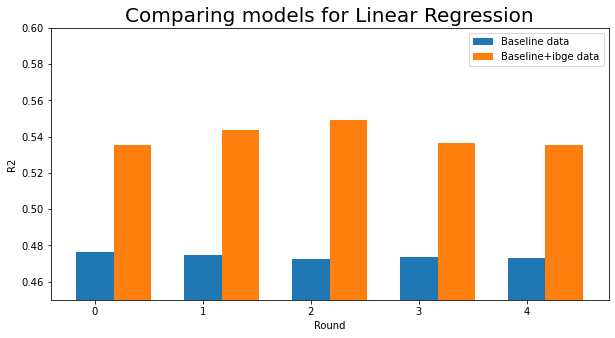

In [21]:
Num_rounds = 5

index = np.arange(Num_rounds)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (10,5))

baseline = ax.bar(index, Results_LinearRegression_r2_Baseline[:Num_rounds], bar_width, label = 'Baseline data')
ibge = ax.bar(index + bar_width, Results_LinearRegression_r2[:Num_rounds], bar_width, label = 'Baseline+ibge data')

ax.set_xlabel('Round')
ax.set_ylabel('R2')
ax.set_title("Comparing models for Linear Regression", fontsize = 20)
ax.legend()
ax.set_ylim([0.45, 0.6])

plt.show()

### Decision Tree

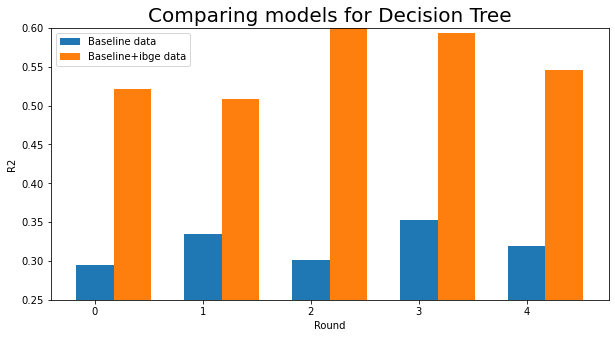

In [22]:
Num_rounds = 5

index = np.arange(Num_rounds)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (10,5))

baseline = ax.bar(index, Results_DecisionTree_r2_Baseline[:Num_rounds], bar_width, label = 'Baseline data')
ibge = ax.bar(index + bar_width, Results_DecisionTree_r2[:Num_rounds], bar_width, label = 'Baseline+ibge data')

ax.set_xlabel('Round')
ax.set_ylabel('R2')
ax.set_title("Comparing models for Decision Tree", fontsize = 20)
ax.legend()
ax.set_ylim([0.25, 0.6])

plt.show()

### Random Forest

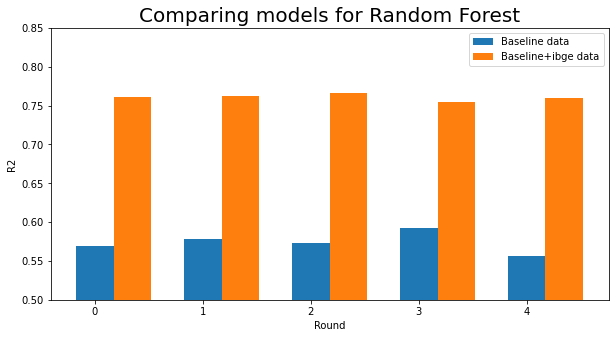

In [23]:
Num_rounds = 5

index = np.arange(Num_rounds)
bar_width = 0.35

fig, ax = plt.subplots(figsize = (10,5))

baseline = ax.bar(index, Results_RandomForest_r2_Baseline[:Num_rounds], bar_width, label = 'Baseline data')
ibge = ax.bar(index + bar_width, Results_RandomForest_r2[:Num_rounds], bar_width, label = 'Baseline+ibge data')

ax.set_xlabel('Round')
ax.set_ylabel('R2')
ax.set_title("Comparing models for Random Forest", fontsize = 20)
ax.legend()
ax.set_ylim([0.5, 0.85])

plt.show()

## Test data leakage including price per square foot

Add the information about price per square, that was calculated dividing the price by the footage, to sse how the models perform when the target information is leaked in the features.

I'll consider only the baseline data.

Consider Decision Tree and Random Forest models.

In [24]:
X_Data_Baseline_Leaked = df_prices[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor/m2']].to_numpy()
X_Data = df_prices_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V005', 'V007', 'V009', 'V011']].to_numpy()

### Decision Tree

In [25]:
RegressorTree = tree.DecisionTreeRegressor()
Results_DecisionTree_r2_Baseline_Leaked = []
Results_DecisionTree_mae_Baseline_Leaked = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(RegressorTree, X_Data_Baseline_Leaked, Y_Data_Baseline, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_DecisionTree_r2_Baseline_Leaked.append(scores['test_r2'].mean())
    Results_DecisionTree_mae_Baseline_Leaked.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_DecisionTree_r2_Baseline_Leaked).mean())
print("r2 var: ", np.array(Results_DecisionTree_r2_Baseline_Leaked).var())
print("Mae mean: ", np.array(Results_DecisionTree_mae_Baseline_Leaked).mean())
print("Mae var: ", np.array(Results_DecisionTree_mae_Baseline_Leaked).var())

r2 mean:  0.9891608031241399
r2 var:  2.739558979246422e-06
Mae mean:  0.06850112124072563
Mae var:  4.531553043009221e-06


### Random Forest

In [26]:
RandomForest = RandomForestRegressor(n_estimators = 50)
Results_RandomForest_r2_Baseline_Leaked = []
Results_RandomForest_mae_Baseline_Leaked = []
for i in range(30):
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)
    scores = cross_validate(RandomForest, X_Data_Baseline_Leaked, Y_Data_Baseline, cv = kfold, scoring = ('r2', 'neg_mean_absolute_error'))
    
    Results_RandomForest_r2_Baseline_Leaked.append(scores['test_r2'].mean())
    Results_RandomForest_mae_Baseline_Leaked.append((-1)*scores['test_neg_mean_absolute_error'].mean())
print("r2 mean: ", np.array(Results_RandomForest_r2_Baseline_Leaked).mean())
print("r2 var: ", np.array(Results_RandomForest_r2_Baseline_Leaked).var())
print("Mae mean: ", np.array(Results_RandomForest_mae_Baseline_Leaked).mean())
print("Mae var: ", np.array(Results_RandomForest_mae_Baseline_Leaked).var())

r2 mean:  0.9934878019226041
r2 var:  8.700562927771681e-07
Mae mean:  0.04520989781626707
Mae var:  1.575779890326702e-06


**We can see that, even without considering IBGE data, these two models performed better than any model before. Indeed, they almost reached the maximum value of 1.0 for the R2 metric and had a much smaller Mean Absolute Error.**

**These results are due the leakage of the price target in the feature price per square foot.**

## Use best model in real data

I'll get real data from 5 houses that are being sold in the website https://www.zapimoveis.com.br/

I'll consider only the best machine learning model obtaneid before, which is random forest using the baseline data plus IBGE data.

Train model using the entire data:

In [29]:
RandomForest = RandomForestRegressor(n_estimators = 50)

RandomForest.fit(X_Data, Y_Data)

RandomForestRegressor(n_estimators=50)

Construct dataframe with the real data from 5 houses

Links for chosen houses:
<br>
1 - https://www.zapimoveis.com.br/imovel/venda-apartamento-2-quartos-com-piscina-santo-amaro-zona-sul-sao-paulo-sp-41m2-id-2552674191/
<br>
2 - https://www.zapimoveis.com.br/imovel/venda-apartamento-3-quartos-com-interfone-paraiso-zona-sul-sao-paulo-sp-107m2-id-2565116229/
<br>
3 - https://www.zapimoveis.com.br/imovel/venda-apartamento-3-quartos-com-piscina-moema-zona-sul-sao-paulo-sp-172m2-id-2550264057/
<br>
4 - https://www.zapimoveis.com.br/imovel/venda-apartamento-2-quartos-com-piscina-vila-leopoldina-zona-oeste-sao-paulo-sp-69m2-id-2462108806/
<br>
5 - https://www.zapimoveis.com.br/imovel/venda-apartamento-3-quartos-com-piscina-brooklin-zona-sul-sao-paulo-sp-131m2-id-2557941187/

In [64]:
data_real_houses = {'Rua':['Avenida Mário Lopes Leão, 916', 'Rua Doutor Tomás Carvalhal', 'Avenida Cotovia', 'Rua Lauriano Fernandes Júnior', 'Rua Michigan, 470'],
                   'Metragem':[41, 107, 172, 69, 131],
                   'Quartos':[2, 3, 3, 2, 3],
                   'Banheiros':[1, 2, 5, 2, 5],
                   'Vagas':[1, 1, 3, 1, 2],
                   'Valor':[0.154900, 1.060000, 3.386078, 0.760000, 2.338000]}
df_real_houses = pd.DataFrame(data_real_houses, index = [1,2,3,4,5])

In [65]:
df_real_houses

,Rua,Metragem,Quartos,Banheiros,Vagas,Valor
1,"Avenida Mário Lopes Leão, 916",41,2,1,1,0.154900
2,Rua Doutor Tomás Carvalhal,107,3,2,1,1.060000
3,Avenida Cotovia,172,3,5,3,3.386078
4,Rua Lauriano Fernandes Júnior,69,2,2,1,0.760000
5,"Rua Michigan, 470",131,3,5,2,2.338000


**Add IBGE data**

I organized the code of day 4 to add IBGE data in a single function

In [47]:
import geopandas as gpd
from shapely.geometry import Point

def AddIBGEdata(df):
    #Read data from enderecos.csv
    df_address = pd.read_csv('../data/interim/Data_Day4_Address.csv', sep = ',', encoding = 'utf_8')

    #Extract address data from collumn 'Rua', and create column 'Rua_Compare' to make merge with df_address
    df["Rua_Compare"] = df["Rua"].str.extract(r'(^[\w ]+)')
    df["Rua_Compare"] = df["Rua_Compare"].str.lower().str.strip()

    #Merge df and df_address
    df_merged = df.merge(df_address[['cep','latitude','longitude','Rua_Compare']], how = 'left', left_on = 'Rua_Compare', right_on = "Rua_Compare")

    #Drop duplicates
    df_merged.drop_duplicates(subset=df.columns, inplace = True)

    #Get data from censo sectors  in Sao Paulo using geopandas
    setor_censo = gpd.read_file('../data/raw/35SEE250GC_SIR.shp')
    setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]

    df_merged["Point"] = ""
    for i in df_merged.index:
        df_merged["Point"][i] = Point(df_merged["longitude"][i], df_merged["latitude"][i])
    df_merged['setor_censo'] = df_merged["Point"].map(lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values).str[0]

    df_merged['setor_censo'] = pd.to_numeric(df_merged['setor_censo'])
    
    #Drop rows with NaN value in 'setor_censo'
    df_merged.drop(df_merged[df_merged['setor_censo'].isnull()].index.tolist(), axis = 0, inplace = True)
    
    #Get data from IBGE (already clenaed)
    df_ibge = pd.read_csv('../data/interim/IBGE_cleaned.csv')

    #Merge the original dataframe with IBGE dataframe
    df_prices_ibge = pd.merge(left = df_merged, right = df_ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")

    return df_prices_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor', 'V005', 'V007', 'V009', 'V011']]

In [66]:
df_real_houses_ibge = AddIBGEdata(df_real_houses)

C:\Users\andre\AppData\Local\Temp\ipykernel_4192\1880083882.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_address = pd.read_csv('../data/interim/Data_Day4_Address.csv', sep = ',', encoding = 'utf_8')
C:\Users\andre\AppData\Local\Temp\ipykernel_4192\1880083882.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged["Point"][i] = Point(df_merged["longitude"][i], df_merged["latitude"][i])


In [67]:
df_real_houses_ibge

,Metragem,Quartos,Banheiros,Vagas,Valor,V005,V007,V009,V011
0,41,2,1,1,0.154900,2118.44,2466.40,1225.60,1956.19
1,107,3,2,1,1.060000,11328.64,11740.59,6242.97,8680.70
2,172,3,5,3,3.386078,6999.68,7390.52,3810.66,5342.22
3,69,2,2,1,0.760000,2292.57,4313.42,1571.18,3488.55
4,131,3,5,2,2.338000,2289.20,3257.11,1612.90,2790.93


In [89]:
X_Data_real = df_real_houses_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V005', 'V007', 'V009', 'V011']].to_numpy()
Y_Data_real = df_real_houses_ibge['Valor'].to_numpy().reshape((5,))

In [90]:
predictions = RandomForest.predict(X_Data_real)
predictions

array([0.371918  , 1.56126   , 1.71602   , 0.67930008, 1.08494   ])

Change units to reais (Brazilian currency). Before, it was in units of 10^6 reais

In [91]:
predictions = (1e6)*predictions
Y_Data_real = (1e6)*Y_Data_real

In [92]:
table = {'Predicted price':predictions, 'Real price':Y_Data_real}
df_table = pd.DataFrame(table)

In [94]:
df_table

,Predicted price,Real price
0,371918.00,154900.0
1,1561260.00,1060000.0
2,1716020.00,3386078.0
3,679300.08,760000.0
4,1084940.00,2338000.0


Calculate R2 and Mean absolute Error

In [95]:
from sklearn.metrics import mean_absolute_error, r2_score

Change again to units of 10^6 reais, to compare with previous metrics.

In [97]:
predictions = (1e-6)*predictions
Y_Data_real = (1e-6)*Y_Data_real

In [98]:
print("Mae: ", mean_absolute_error(Y_Data_real, predictions))
print("R2: ", r2_score(Y_Data_real, predictions))

Mae:  0.7444191839999998
R2:  0.3143121601029819


**Both of the metrics were worse compared to the previous test. Our model seems to have not generalized well to external data.**